<a href="https://colab.research.google.com/github/kyata/introduction_to_ml_with_python/blob/master/intro_to_ml_chapter2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pythonで始める機械学習 第二章
===

# 2.1 クラス分類と回帰

教師あり学習問題は2つに大別することができる  
1. クラス分類(classification)
1. 回帰(regression)

## クラス分類

- しばしば**2クラス分類**と**多クラス分類**に分けられる。


## 回帰

- 連続値を予測することが目的
- 出力に何らかの連続性があることが必要


# 2.2 汎化、過剰適合、適合不足

- 汎化(generalize)  
    - モデルが未見のデータに対して正確に予測ができること  
 

- 過剰適合
    - 持っている情報の量に比べて過度に複雑なモデルを作ってしまうこと
    - 訓練セットの個々の特徴にモデルを適合しすぎると発生
    - 過剰適合は過学習とも呼ばれる

- 適合不足
    - モデルが単純すぎてデータの様々な側面やデータの変異を捉えることができない
    - 訓練セットに対してすらうまく機能できない。
    
 
モデルが複雑になればなるほど、訓練データに対する予測精度は向上するが  
モデルが複雑になりすぎると、訓練セットの個々のデータポイントに重きを置きすぎるようになり  
新しいデータに対してうまく汎化できなくなる

## 2.2.1 モデルの複雑さとデータセットの大きさ

- モデルの複雑さは訓練データ・セットが持つ入力のバリエーションに密接に結びついている

- データ・セットに含まれるデータポイントがバリエーションに富んでいれば、過剰適合を起こすことなくより複雑なモデルを利用できる

- 通常はデータポイントが増えればデータのバリエーションも増えるが、<u>同じデータポイントを複製したり似たようなデータを集めるだけではダメ</u>


- 教師あり学習においては、より多くのデータを用いて適度に複雑なモデルを用いるとうまくいくことが多い

- 実問題ではモデルを弄り回すよりもデータ量を増やしたほうが良い場合も多くある。




![モデルの複雑さと精度](model_complexity_and_accuracy.png)

# 2.3 教師あり機械学習のアルゴリズム

モデルの複雑さという概念が個々のモデルで果たす役割について述べ、  
個々ののアルゴリズムが、モデルを高知雨する方法の概要を示す。

それぞれのアルゴリズムの長所と短所、適しているデータの種類について述べる。
- 重要なパラメータとオプションについても説明する。



## 2.3.1 サンプルデータセット

- さまざまなアルゴリズムの紹介用に用いられるデータセット
- そのうちのいくつかは、小さくて合成したもの(でっち上げたもの)で、アルゴリズムの特定の側面を強調するように設計されている。

- 合成した2クラス分類データ・セットの例
    - forgeデータセット
        - 2つの特徴量を持つ。
        - 散布図では一つの点が一つのデータポイントを表す。
        - 点の色と形はクラスを表す。
       
    



In [6]:
!pip install mglearn

    100% |████████████████████████████████| 542kB 23.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


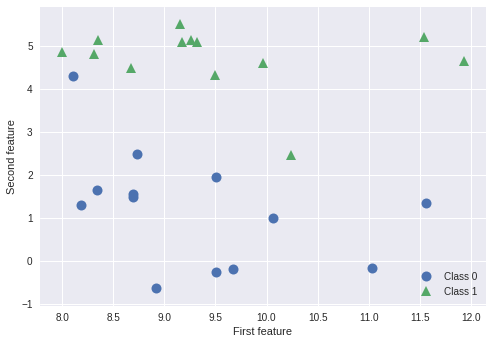

In [7]:
import matplotlib.pyplot as plt
import mglearn

# データセットの生成
X, y = mglearn.datasets.make_forge()

# データセットをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

In [8]:
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# データ・セットCancerのkeyを表示
print("cancer.keys(): \n{}".format(cancer.keys()))

# データ・セットの形状を表示
print("Shape of cancer data: {}".format(cancer.data.shape))

# クラスにおけるサンプル数を表示
print("Sampole counts per class: \n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

# 個々の特徴量の意味を示す記述はfeature_names属性に格納されている
print("Feature names: \n {}".format(cancer.feature_names))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape of cancer data: (569, 30)
Sampole counts per class: 
{'malignant': 212, 'benign': 357}
Feature names: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## 2.3.2 k-最近傍法

- k-最近傍法(k-NN)アルゴリズムは、最も単純な学習アルゴリズム。
- モデルを構築するには訓練データセットを格納するだけで良い
- 新しいデータポイントに対する予測を行う際には訓練データセットの中から一番近い点(最近傍点)を見つける

### 2.3.2.1 k-最近傍法によるクラス分類

- 一番単純なk-NNアルゴリズムは一つの近傍点だけを見ること。

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


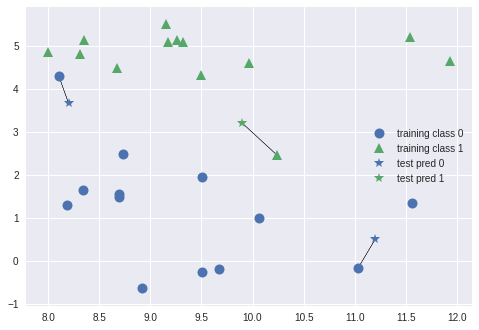

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

- 近傍点は複数設定することもできる。
    - 1つ以上の近傍点を考慮に入れる場合には、**投票**でラベルを決める
    - 個々のテストする点に対して、近傍点のうちいくつがクラス0に属し、いくつがクラス1に属するのかを数え、最も多く現れたmクラスをその点のクラスとする(つまりk-最近傍点の多数派のクラスを採用する)
    
    - 2クラス分類だけでなく、多クラス分類にも同じように使える


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


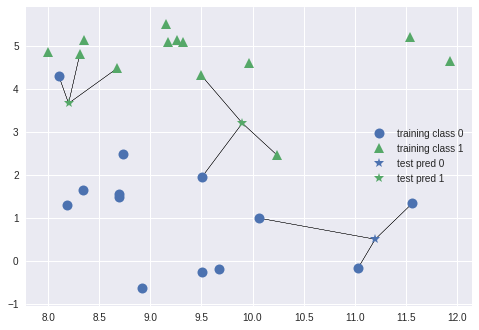

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

はじめにデータを訓練セットとテストセットに分割する  
その後に汎化性能を測定する

In [11]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 教師データを読み込む
X, y = mglearn.datasets.make_forge()

# train_test_split()で教師データを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# クラスをインポートしてインスタンスを生成(近傍点:3)
clf = KNeighborsClassifier(n_neighbors=3)

# 訓練セットを用いてクラス分類器を訓練する
# =>KNeighborsClassifierの場合はデータセットを保存するだけ
clf.fit(X_train, y_train)

# KNeighborsClassifier.predict()でテストデータに対して予測する

# テストセットに対する予測を表示
print("Test set predictions: {}".format(clf.predict(X_test)))
# テストセットに対する精度を表示
print("Test set accuracy:{:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy:0.86


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


### 2.3.2.2 KNeighborsClassifierの解析

- 2次元のデータセットについてはxy平面のすべての点について、予測結果を表示することができる

- 平面をそこに点があったとしたら分類されていたであろうクラスに従って色付けする

- こうするとアルゴリズムが割り出したクラスの**決定境界(decision boundary)**が見える

- 以下のコードはkが1, 3, 9の場合の決定境界を描画したもの

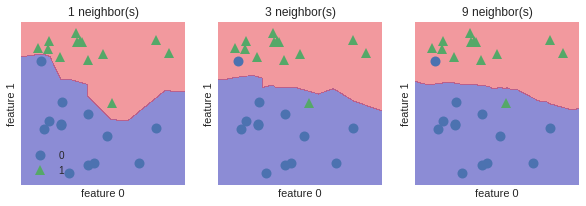

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fitメソッドは自分自身を返すので
    # 1行でインスタンスを生成してfitすることができる
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)

#### プチまとめ

- 1つの最近傍点のみを用いると決定境界は訓練データに近くなる。
- より多くの最近傍点を用いると決定境界はより滑らかになる
- 最近傍点が少ない場合は複雑度の高いモデルに対応する
- 最近傍点が多い場合は複雑度の低いモデルに対応する

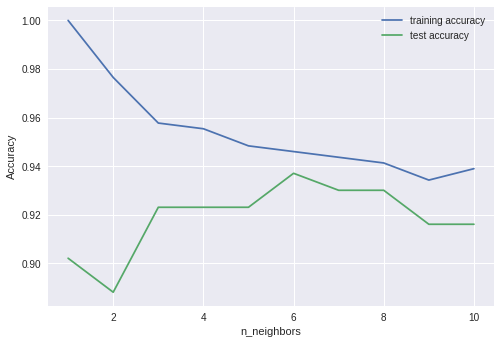

In [13]:
from sklearn.datasets import load_breast_cancer

# 乳がんデータ読み込み
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = [] # 訓練セット精度
test_accuracy = []        # 汎化精度
neighbors_settings = range(1, 11)    # n_neighborsを1から10まで試す

for n_neighbors in neighbors_settings:
    # モデルを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


上記のグラフの解説
- y軸 : 訓練セット・テストセットに対する精度
- x軸 : 考慮する最近傍点

### 続きをあとで書く

### 2.3.2.3 k-近傍回帰

- k-最近傍法で回帰を行う変種。

緑色の★ : ３つのテストデータポイント  
青色の★ :  近傍点から出した予測点

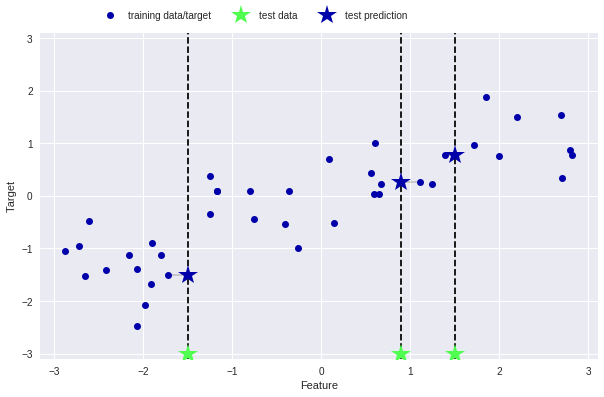

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

クラス分類の場合と同様により多くの最近傍点を用いることもできる  
複数の最近傍点を用いた場合は最近傍点の平均値が予測値になる

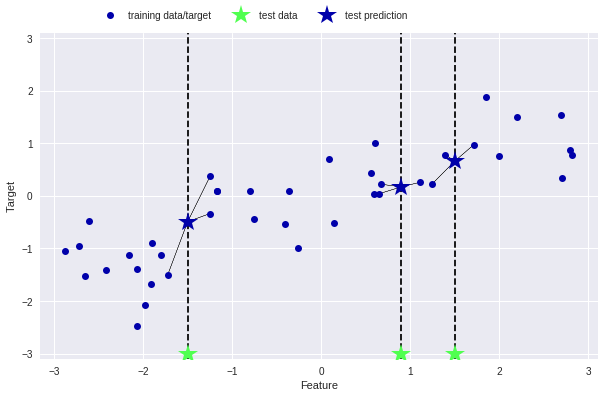

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [16]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# waveデータセットを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

# テストセットに対する精度を出力
print("Test set prediction: \n{}".format(reg.predict(X_test)))

# score()回帰予測器はR^2スコアを返す
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set prediction: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


### R2スコアの解説
- R^2スコアは**回帰モデルの予測の正確さを図る指標**
- *決定係数(coefficient of determination)*とも呼ばれる
- 0から1までの値を取る
    - 1は完全な予測に対応
    - 0は訓練セットのレスポンス値(y_train)の平均を返すだけ


### 2.3.2.4 KNeighborsRegressorの解析

- 一次元のデータセットに対して、すべての値に対する予測値がどのようになるか
    - たくさんのデータポイントを持つデータセットを作る



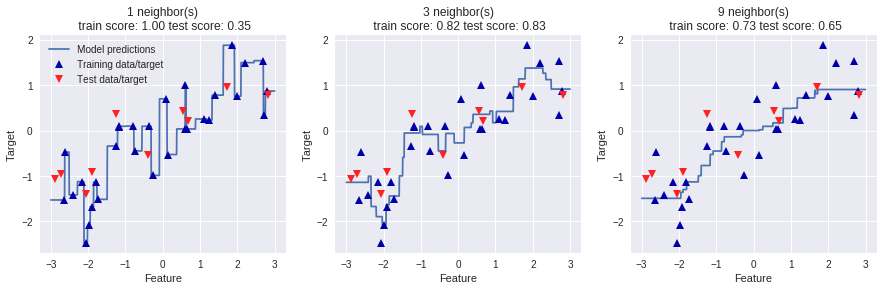

In [22]:
fix, axes = plt.subplots(1, 3, figsize=(15, 4))

# -3から3までの間に1000点のデータポイントを作る
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, 
        reg.score(X_train, y_train),
        reg.score(X_test, y_test))
    )
    
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"],
               loc="best")


- 1最近傍点による回帰では訓練セットの個々の点が明らかに予測に影響を与えている
    - 予測はすべての訓練データポイントを通っているため予測は非常に不安定になっている
- 考慮する最近傍点を増やしていくと予測はスムーズになるが訓練データに対する適合度は下がる

### 2.3.2.5 利点と欠点とパラメータ
- KNeighbors分類器には２つの重要なパラメータがある
    1. 近傍数の数
    1. データポイント間の距離測度
    
- 実用上、近傍点の数は3や5程度の小さな数で十分な場合がほとんど
- パラメータは調整する必要がある
- 適切な距離測度の選択は難しい(この本の範囲を若干超える)
- 距離測度はデフォルトでは**ユークリッド距離**を用いることが多く、ほとんどの場合はこれでOK  

#### k-最近傍法の利点

- モデルの理解が容易
- 最近傍法のモデル構築は非常に高速
- 多くの場合あまり調整をしなくても十分な性能を示す
- より高度な技術の利用を考える前にこのアルゴリズムをベースラインとして用いるとよい

#### k-最近傍法の注意点

- 訓練セットが大きくなると予測は遅くなる(特徴量数/サンプル数 増加に対してどちらでも遅くなる)
    - 多数の特徴量(数百次元以上)を持つデータセットではうまく機能しない

- k-最近傍法アルゴリズムを用いる際はデータの前処理が重要 
    - ref. 第3章「教師なし学習と前処理」
    
- ほとんどの特徴量が多くの場合0となるような**疎なデータセット(sparse dataset)**では特に性能が悪い  
  

- k-最近傍法は理解し易い反面、処理速度が遅く多数の特徴量を扱えないため  
<u>**実際には殆ど使われていない**</u>
  
これ以降に詳解される計算アルゴリズムはこういった問題点がないらしい。

